Selecting the different models to fit and predict with the same Dataset used in our proposed model to compare and find which model gives best accuracy.

Two vectorization techniques are taken, and used with different models like RandomForestClassifier, SGDClassifier, NaiveBayes classifiers.
Also trained these classifiers with different learning rates and plots the accuracies using matlab plot


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#Tokenization 
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
#Naive Bayes 
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
#LinearModel Pipeline Feature selection
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
#Pre-processing and NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download("stopwords")
import re
import string
#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
URL = "/content/drive/MyDrive/AmazonReviewDS-50k_cleaned.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Dataset- Reading from URL
df = pd.DataFrame(pd.read_csv(URL))
#Removing Null Values from cleaned_reviews column
df = df.dropna(axis=0,subset=['cleaned_reviews'])

In [ ]:
#Tokenization Process 
vectorizer_tfidf = TfidfVectorizer(min_df= 3, sublinear_tf=True, norm='l2', ngram_range=(1,1))
vectorizer_counter = CountVectorizer(ngram_range=(1,1))

In [ ]:
#Splitting data into 80-20 division to train and test
random = np.random.rand(len(df)) < 0.8
df_traindata = df[random]
df_testdata = df[~random]
X_train = df_traindata["cleaned_reviews"]
Y_train = df_traindata["y"]
X_test = df_testdata["cleaned_reviews"]
Y_test = df_testdata["y"]

In [ ]:
#A common method To run and execute any classifier Model, input Classifier
from sklearn import metrics
def run_model_conf_matrix(classifier_clf):
  #Training the model using FIT Method
  classifier_model = classifier_clf.fit(X_train,Y_train)
  predictions = classifier_model.predict(X_test)
  #Predicting test data and printing the accuracy
  print(np.mean(predictions== Y_test))
  return metrics.confusion_matrix(Y_test,predictions)

In [ ]:
#Creating Model Pipelines for various models with the pattern [Tokenizer Method][SelectKBest features][Model+Paramaters]
random_classifier = Pipeline([('vect', vectorizer_counter),('chi',  SelectKBest(chi2, k=1200)),('clf', RandomForestClassifier()),])
print("Random Forest Classifier - Count Vectorizer:")
confusion_matrix = run_model_conf_matrix(random_classifier)
print(confusion_matrix)

Random Forest Classifier - Count Vectorizer:
0.8277565007055029
[[ 745   15  790]
 [ 106   12  613]
 [ 168   17 7456]]


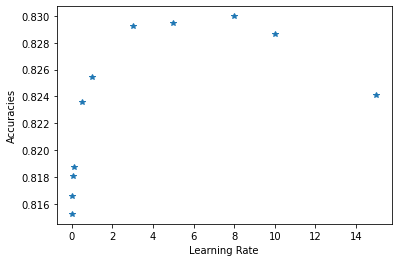

[0.8152590203587986, 0.816569240072566, 0.8180810320499899, 0.8187865349727877, 0.8236242693005442, 0.8254384196734529, 0.8292682926829268, 0.8294698649465834, 0.8299737956057247, 0.8286635758919573, 0.8241281999596856]


In [ ]:
alpha = [0.001,0.01,0.05,0.1,0.5,1,3,5,8,10,15]
y_accuracy=[]
for x in alpha:
    clf = Pipeline([('vect', vectorizer_counter),('chi',  SelectKBest(chi2, k=2890)),('clf', MultinomialNB(alpha=x)),])
    classifier_model = clf.fit(X_train,Y_train)
    y_accuracy.append(np.mean(classifier_model.predict(X_test)== Y_test))
plt.plot(alpha,y_accuracy,'*')
plt.ylabel('Accuracies')
plt.xlabel('Learning Rate')
plt.show()
print(y_accuracy)


In [ ]:
random_classifier2 = Pipeline([('vect',vectorizer_tfidf),('chi',  SelectKBest(chi2, k=1200)),('clf', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       criterion='gini', 
                   n_estimators=100,max_depth=80)),])
print("Random Forest Classifier - TDF-IDF Vectorizer:")
confusion_matrix = run_model_conf_matrix(random_classifier2)
print(confusion_matrix)

Random Forest Classifier - TDF-IDF Vectorizer:
0.8291675065510986
[[ 687    3  860]
 [  95    2  634]
 [ 100    3 7538]]


In [ ]:
multinomialNB_classifier = Pipeline([('vect', vectorizer_counter),('chi',  SelectKBest(chi2, k=2890)),('clf', MultinomialNB(alpha=1)),])
print("multinomialNB_classifier - Count Vectorizer:")
confusion_matrix = run_model_conf_matrix(multinomialNB_classifier)
print(confusion_matrix)

multinomialNB_classifier - Count Vectorizer:
0.8254384196734529
[[ 932   63  555]
 [ 157   74  500]
 [ 344  113 7184]]


In [ ]:
multinomialNB_classifier2 = Pipeline([('vect', vectorizer_tfidf),('chi',  SelectKBest(chi2, k=2890)),('clf', MultinomialNB(alpha=1)),])
print("multinomialNB_classifier - Count Vectorizer:")
confusion_matrix = run_model_conf_matrix(multinomialNB_classifier2)
print(confusion_matrix)



multinomialNB_classifier - Count Vectorizer:
0.8041725458576899
[[ 370    0 1180]
 [  27    0  704]
 [  32    0 7609]]


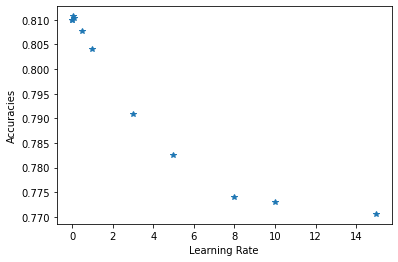

[0.8099173553719008, 0.8100181415037291, 0.8107236444265269, 0.8104212860310421, 0.8078008466035074, 0.8041725458576899, 0.7908687764563596, 0.7825035275146139, 0.7741382785728683, 0.7729288449909293, 0.7706107639588793]


In [ ]:
alpha = [0.001,0.01,0.05,0.1,0.5,1,3,5,8,10,15]
y_accuracy=[]
for x in alpha:
    clf = Pipeline([('vect', vectorizer_tfidf),('chi',  SelectKBest(chi2, k=2890)),('clf', MultinomialNB(alpha=x)),])
    classifier_model = clf.fit(X_train,Y_train)
    y_accuracy.append(np.mean(classifier_model.predict(X_test)== Y_test))
plt.plot(alpha,y_accuracy,'*')
plt.ylabel('Accuracies')
plt.xlabel('Learning Rate')
plt.show()
print(y_accuracy)

In [ ]:
complementNB_classifier = Pipeline([('vect', vectorizer_counter),('chi',  SelectKBest(chi2, k=2890)),('clf', ComplementNB(alpha=1)),])
print("complementNB_classifier - Count Vectorizer:")
confusion_matrix = run_model_conf_matrix(complementNB_classifier)
print(confusion_matrix)

complementNB_classifier - Count Vectorizer:
0.7916750655109857
[[1233   47  270]
 [ 299   72  360]
 [ 924  167 6550]]


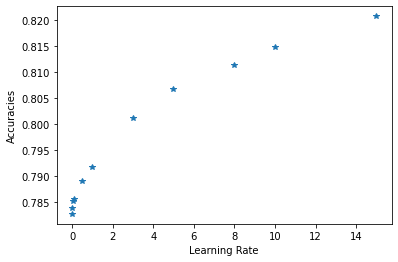

[0.7827050997782705, 0.7839145333602097, 0.7851239669421488, 0.78562789760129, 0.7889538399516226, 0.7916750655109857, 0.801048175771014, 0.8066921991533965, 0.8113283612174965, 0.8147550896996574, 0.8207014714775247]


In [ ]:
alpha = [0.001,0.01,0.05,0.1,0.5,1,3,5,8,10,15]
y_accuracy=[]
for x in alpha:
    clf = Pipeline([('vect', vectorizer_counter),('chi',  SelectKBest(chi2, k=2890)),('clf', ComplementNB(alpha=x)),])
    classifier_model = clf.fit(X_train,Y_train)
    y_accuracy.append(np.mean(classifier_model.predict(X_test)== Y_test))
plt.plot(alpha,y_accuracy,'*')
plt.ylabel('Accuracies')
plt.xlabel('Learning Rate')
plt.show()
print(y_accuracy)

In [ ]:
complementNB_classifier2 = Pipeline([('vect', vectorizer_tfidf),('chi',  SelectKBest(chi2, k=2890)),('clf', ComplementNB(alpha=1)),])
print("complementNB_classifier2 - vectorizer_tfidf:")
confusion_matrix = run_model_conf_matrix(complementNB_classifier2)
print(confusion_matrix)

complementNB_classifier2 - vectorizer_tfidf:
0.7881475508969966
[[1265   54  231]
 [ 352   77  302]
 [ 961  202 6478]]


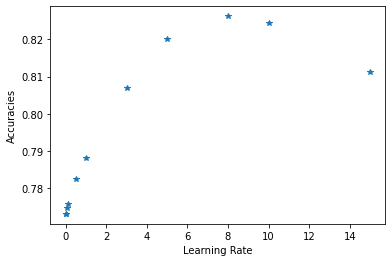

[0.7730296311227575, 0.7730296311227575, 0.7745414231001814, 0.7756500705502922, 0.7825035275146139, 0.7881475508969966, 0.8069945575488813, 0.8201975408183834, 0.826244708728079, 0.8245313444869986, 0.8112275750856682]


In [ ]:
alpha = [0.001,0.01,0.05,0.1,0.5,1,3,5,8,10,15]
y_accuracy=[]
for x in alpha:
    clf = Pipeline([('vect', vectorizer_tfidf),('chi',  SelectKBest(chi2, k=2890)),('clf', ComplementNB(alpha=x)),])
    classifier_model = clf.fit(X_train,Y_train)
    y_accuracy.append(np.mean(classifier_model.predict(X_test)== Y_test))
plt.plot(alpha,y_accuracy,'*')
plt.ylabel('Accuracies')
plt.xlabel('Learning Rate')
plt.show()
print(y_accuracy)

In [ ]:
bernoulliNB_classifier = Pipeline([('vect', vectorizer_counter),('chi',  SelectKBest(chi2, k=2890)),('clf', BernoulliNB(alpha=1)),])
print("bernoulliNB_classifier - Count Vectorizer:")
confusion_matrix = run_model_conf_matrix(bernoulliNB_classifier)
print(confusion_matrix)


bernoulliNB_classifier - Count Vectorizer:
0.7499496069340859
[[ 714   98  738]
 [ 124  135  472]
 [ 351  698 6592]]


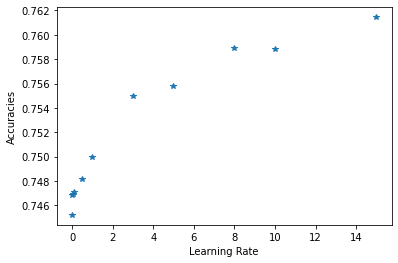

[0.7452126587381577, 0.7468252368474098, 0.746926022979238, 0.7471275952428946, 0.7481354565611772, 0.7499496069340859, 0.7549889135254989, 0.755795202580125, 0.7589195726668011, 0.7588187865349728, 0.7614392259625076]


In [ ]:
alpha = [0.001,0.01,0.05,0.1,0.5,1,3,5,8,10,15]
y_accuracy=[]
for x in alpha:
    clf = Pipeline([('vect', vectorizer_counter),('chi',  SelectKBest(chi2, k=2890)),('clf', BernoulliNB(alpha=x)),])
    classifier_model = clf.fit(X_train,Y_train)
    y_accuracy.append(np.mean(classifier_model.predict(X_test)== Y_test))
plt.plot(alpha,y_accuracy,'*')
plt.ylabel('Accuracies')
plt.xlabel('Learning Rate')
plt.show()
print(y_accuracy)

In [ ]:
bernoulliNB_classifier2 = Pipeline([('vect', vectorizer_tfidf),('chi',  SelectKBest(chi2, k=2890)),('clf', BernoulliNB(alpha=1)),])
print("bernoulliNB_classifier2 - vectorizer_tfidf:")
confusion_matrix = run_model_conf_matrix(bernoulliNB_classifier2)
print(confusion_matrix)


bernoulliNB_classifier2 - vectorizer_tfidf:
0.742289860915138
[[ 703  135  712]
 [ 104  171  456]
 [ 299  851 6491]]


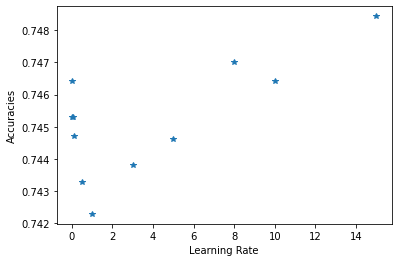

[0.7464220923200967, 0.7453134448699859, 0.7453134448699859, 0.7447087280790163, 0.7432977222334207, 0.742289860915138, 0.743801652892562, 0.744607941947188, 0.7470268091110663, 0.7464220923200967, 0.748437814956662]


In [ ]:
alpha = [0.001,0.01,0.05,0.1,0.5,1,3,5,8,10,15]
y_accuracy=[]
for x in alpha:
    clf = Pipeline([('vect', vectorizer_tfidf),('chi',  SelectKBest(chi2, k=2890)),('clf', BernoulliNB(alpha=x)),])
    classifier_model = clf.fit(X_train,Y_train)
    y_accuracy.append(np.mean(classifier_model.predict(X_test)== Y_test))
plt.plot(alpha,y_accuracy,'*')
plt.ylabel('Accuracies')
plt.xlabel('Learning Rate')
plt.show()
print(y_accuracy)

In [ ]:
SGDC_classifier = Pipeline([('vect', vectorizer_counter),('chi',  SelectKBest(chi2, k=1800)),('clf', SGDClassifier(alpha=0.00001)),])
print("SGDC_classifier - Count Vectorizer:")
confusion_matrix = run_model_conf_matrix(SGDC_classifier)
print(confusion_matrix)

SGDC_classifier - Count Vectorizer:
0.8361217496472485
[[ 983   53  514]
 [ 188   61  482]
 [ 289  100 7252]]


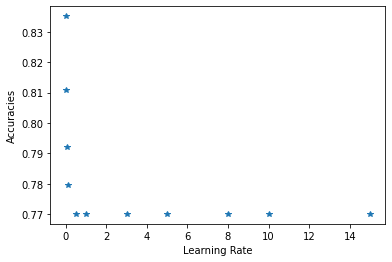

[0.8351138883289659, 0.8107236444265269, 0.7919774239064705, 0.7794799435597661, 0.770106833299738, 0.770106833299738, 0.770106833299738, 0.770106833299738, 0.770106833299738, 0.770106833299738, 0.770106833299738]


In [ ]:
alpha = [0.001,0.01,0.05,0.1,0.5,1,3,5,8,10,15]
y_accuracy=[]
for x in alpha:
    clf = Pipeline([('vect', vectorizer_counter),('chi',  SelectKBest(chi2, k=2890)),('clf', SGDClassifier(alpha=x)),])
    classifier_model = clf.fit(X_train,Y_train)
    y_accuracy.append(np.mean(classifier_model.predict(X_test)== Y_test))
plt.plot(alpha,y_accuracy,'*')
plt.ylabel('Accuracies')
plt.xlabel('Learning Rate')
plt.show()
print(y_accuracy)

In [ ]:
SGDC_classifier2 = Pipeline([('vect', vectorizer_tfidf),('chi',  SelectKBest(chi2, k=2890)),('clf', SGDClassifier(alpha=1)),])
print("SGDC_classifier2 - vectorizer_tfidf:")
confusion_matrix = run_model_conf_matrix(SGDC_classifier2)
print(confusion_matrix)


SGDC_classifier2 - vectorizer_tfidf:
0.770106833299738
[[   0    0 1550]
 [   0    0  731]
 [   0    0 7641]]


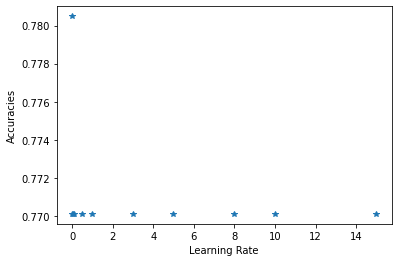

[0.7804878048780488, 0.770106833299738, 0.770106833299738, 0.770106833299738, 0.770106833299738, 0.770106833299738, 0.770106833299738, 0.770106833299738, 0.770106833299738, 0.770106833299738, 0.770106833299738]


In [ ]:
alpha = [0.001,0.01,0.05,0.1,0.5,1,3,5,8,10,15]
y_accuracy=[]
for x in alpha:
    clf = Pipeline([('vect', vectorizer_tfidf),('chi',  SelectKBest(chi2, k=2890)),('clf', SGDClassifier(alpha=x)),])
    classifier_model = clf.fit(X_train,Y_train)
    y_accuracy.append(np.mean(classifier_model.predict(X_test)== Y_test))
plt.plot(alpha,y_accuracy,'*')
plt.ylabel('Accuracies')
plt.xlabel('Learning Rate')
plt.show()
print(y_accuracy)